In [14]:
import os
os.chdir('/content/drive/MyDrive/Ineuron_Practical')

In [15]:
ls

'5 different CNN architectures of CIFAR-10 .ipynb'
 Ann_Regression_analysis_Grid_search.ipynb
 Assignment1_Fashion_Mnist.ipynb
 Batch_normalization_Keras.ipynb
 Convolutional_Neural_Network_World_1.ipynb
 full_mnist_model.h5
 June_6_batch.ipynb
 log/
 Mnist_dataset_ANN.ipynb
'Mnist_dataset_ANN_With Callbacks.ipynb'
'Mnist_with_5_different_Networks .ipynb'
 model_best_fashion.h5
 model_ckpt.h5
 model.weights.best_1.hdf5
 model.weights.best.hdf5
 my_logs/
 pretrained_mnist_model.h5
'Pure MNIST CNN Model.ipynb'
'Regression_Model_Using Keras.ipynb'
 Trained_model/


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline


In [17]:
mnist = tf.keras.datasets.mnist.load_data()
(xtrain,ytrain),(xtest,ytest) = mnist

In [18]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


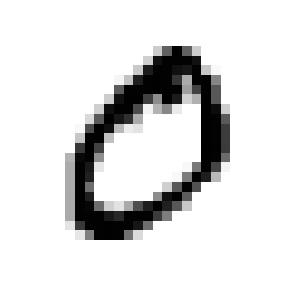

In [19]:
plt.figure(figsize=(8,5))
plt.imshow(xtrain[1],cmap='binary')
plt.axis('off')
plt.show()


In [20]:
xtrain_scaled = xtrain/255.
xtest_scaled  = xtest/255.

In [21]:
from keras.utils import np_utils

no_class = 10

y_train = np_utils.to_categorical(ytrain,num_classes=no_class)
y_test = np_utils.to_categorical(ytest,num_classes=no_class)
print(ytrain[:5])
print(y_train[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [22]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

X_train = xtrain_scaled.reshape(xtrain.shape[0], img_rows, img_cols, 1)
X_test = xtest_scaled.reshape(xtest.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [23]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import clear_session

In [42]:
clear_session()
model = Sequential()

model.add(Conv2D(16,kernel_size=5,strides=1,kernel_initializer='he_normal',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(BatchNormalization())

#model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,kernel_size=3,activation='relu'))
#model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=2,activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))



#Step 4 - Flattening the data
model.add(Flatten())

#model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 10, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 16)          0

In [43]:
sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD")
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [44]:
# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics=['accuracy'])

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best_1.hdf5', verbose=1, 
                               save_best_only=True)
Early_stopping = EarlyStopping(patience=10,verbose=1,restore_best_weights=True)
hist = model.fit(X_train, y_train, epochs=100,
          validation_split=0.3, callbacks=[checkpointer,Early_stopping])
          #verbose=2, shuffle=True)

Epoch 1/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3858 - accuracy: 0.8759 - val_loss: 0.0920 - val_accuracy: 0.9716

Epoch 00001: val_loss improved from inf to 0.09200, saving model to model.weights.best_1.hdf5
Epoch 2/100
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1366 - accuracy: 0.9581 - val_loss: 0.1150 - val_accuracy: 0.9646

Epoch 00002: val_loss did not improve from 0.09200
Epoch 3/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1074 - accuracy: 0.9675 - val_loss: 0.0651 - val_accuracy: 0.9796

Epoch 00003: val_loss improved from 0.09200 to 0.06511, saving model to model.weights.best_1.hdf5
Epoch 4/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0894 - accuracy: 0.9724 - val_loss: 0.0561 - val_accuracy: 0.9832

Epoch 00004: val_loss improved from 0.06511 to 0.05605, saving model to model.weights.best_1.hdf5
Epoch 5/100
1313/1313 [==============================] - 9s 7ms/step - lo